<a href="https://colab.research.google.com/github/assismauro/CursoPython/blob/master/RasterHistogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raster Histogram

#### This Colab Notebook creates a frequency histogram based on values of a raster map.

#### I tested with TIFF, may be it works with another formats as well.

In [ ]:
# read image. Your file name should be available in Google Drive.
# Some tips about that: https://stackoverflow.com/questions/54951120/how-to-access-files-on-google-colab-notebook
with rio.open('/content/drive/My Drive/Data/Dif_eba_3inv_Mgha_5880.tif') as src:
    map = src.read(1,masked=True) 

In [ ]:
# install libraries that are not included in Colab VM
! pip install rasterio
! pip install earthpy
# imports
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.plot as ep
import matplotlib.pylab as pylab
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [ ]:
# print some numbers
print(np.shape(map))
print(np.amax(map))
print(np.amin(map))
print(np.shape(map)[0]*np.shape(map)[1])

In [ ]:
# transforms image in a numpy vector. This is necessary to input in the histogram routine
mapA = np.ravel(map).T

In [ ]:
print(mapA.shape)
# removing outliers
minValue = -200
maxValue =  200
mapA = mapA[(mapA >= minValue) & (mapA <= maxValue)]
print(mapA.shape)
print(np.amax(map))
print(np.amin(map))

In [ ]:
# histogram bins ("x" axis)
numberofbins = 40
bins = np.arange(-maxValue,maxValue,(maxValue-minValue)/numberofbins)
print(bins)

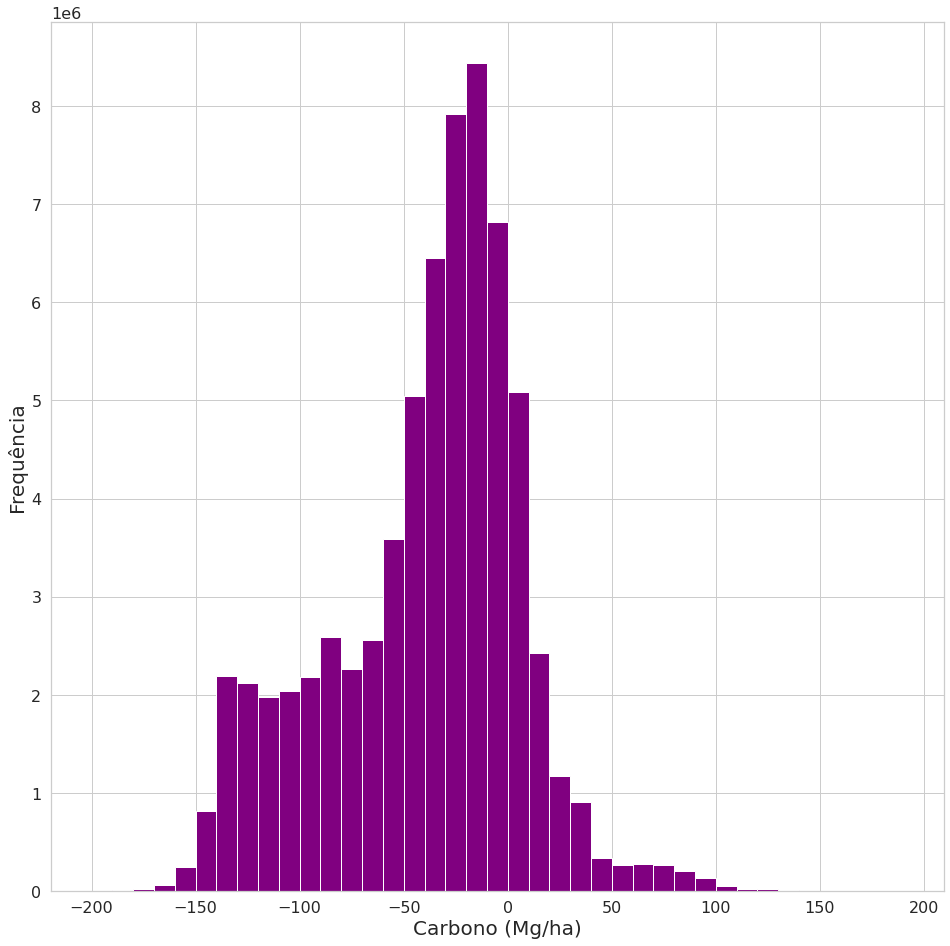

In [37]:
# plotting!
plt.clf()
plt.rcParams["figure.figsize"] = [16,16]
plt.xlabel('Carbono (Mg/ha)',fontsize=20)
plt.ylabel('Frequência',fontsize=20)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.hist(mapA, color='purple',bins=bins)
plt.savefig('/content/drive/My Drive/Data/ColabOutputs/dif_c4inv_c3inv_antropizada_20bins.png',dpi=300,format='png')